## SENSE reconstruction 
###### Author: Zimu Huo
###### Date: 02.2022


-------------------------------------------------------------------------
References
    
    [1] 
    Author: Klaas P. Pruessmann et al. 
    Title: SENSE: Sensitivity Encoding for Fast MRI
    Link: https://pubmed.ncbi.nlm.nih.gov/10542355/

In [1]:
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import util.coil as coil 
import util.phantom as phantom
import numpy as np
import util.mask as undersample
from util.fft import *
from util.sense import *
import util.io as io
from util.twix import * 
from util.gfactor import *

In [2]:
file_sms = "../meas_MID00134_FID55501_catesain_4slices.dat"
file = readtwix(file_sms)
data = file[0]['readouts'][...,0]
images = ifft2c(data)  # image for each coil
coilmaps = coil.cmap(images)

Software version: VD/VE (!?)

Scan  0
100 % parsed in 1 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 2 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/1063 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/4 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary.
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   DATA


In [5]:
recon = gfactor_sense(coilmaps, R = 4)

  0%|          | 0/256 [00:00<?, ?it/s]

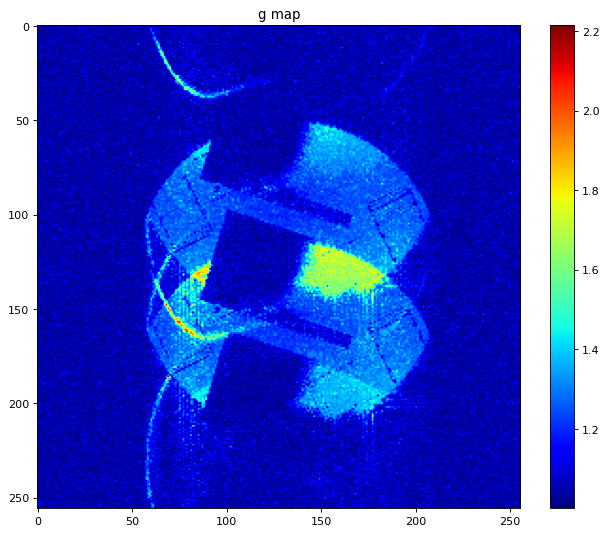

In [6]:
plt.figure(figsize=(12, 8), dpi=80)
tf = plt.imshow(np.abs(recon),cmap='jet')
plt.title("g map")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.show()